In [1]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
url ='https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC'
pd.read_html(url)

[   Unnamed: 0_level_0   2016          2017          2018          2019         \
    Unnamed: 0_level_1     인구   인구밀도     인구   인구밀도     인구   인구밀도     인구   인구밀도   
 0                   계  51218    510  51362    512  51607    514  51709    515   
 1                  서울   9843  16263   9766  16136   9705  16034   9662  15964   
 2                  부산   3447   4477   3424   4447   3400   4416   3373   4380   
 3                  대구   2461   2786   2458   2782   2450   2773   2432   2753   
 4                  인천   2907   2736   2924   2750   2939   2764   2944   2769   
 5                  광주   1502   2997   1495   2984   1493   2980   1494   2980   
 6                  대전   1536   2848   1528   2832   1518   2813   1509   2796   
 7                  울산   1166   1099   1159   1092   1154   1088   1147   1080   
 8                  세종    234    504    266    571    304    653    331    712   
 9                  경기  12600   1237  12786   1255  13031   1279  13238   1299   
 10             

In [3]:
# 테이블 화
table = pd.read_html(url)
len(table)
# 리스트형태인 테이블을 인덱싱으로 각각 불러와진다

33

In [4]:
df = table[4]
df.shape

(97, 9)

In [5]:
df.head()

,연도 (년),추계인구(명),출생자수(명),사망자수(명),자연증가수(명),조출생률 (1000명당),조사망률 (1000명당),자연증가율 (1000명당),합계출산율
0,1925,12997611,558897,359042,199855,43.0,27.6,15.4,6.59
1,1926,13052741,511667,337948,173719,39.2,25.9,13.3,NaN
2,1927,13037169,534524,353818,180706,41.0,27.1,13.9,NaN
3,1928,13105131,566142,357701,208441,43.2,27.3,15.9,NaN
4,1929,13124279,566969,414366,152603,43.2,31.6,11.6,NaN


<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

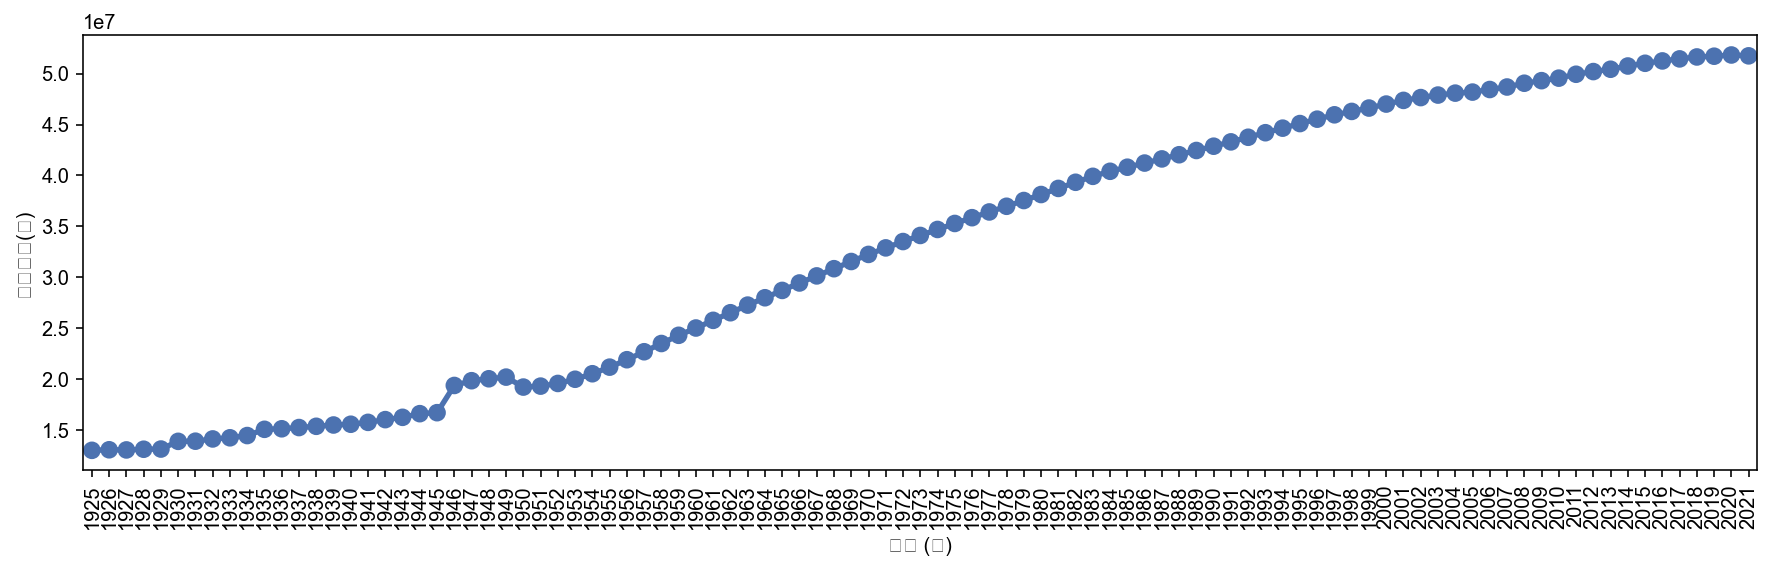

In [6]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


# MAC = 'AppleGothic'
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.set(font='Malgun Gothic')
sns.pointplot(data=df, x='연도 (년)', y='추계인구(명)')

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

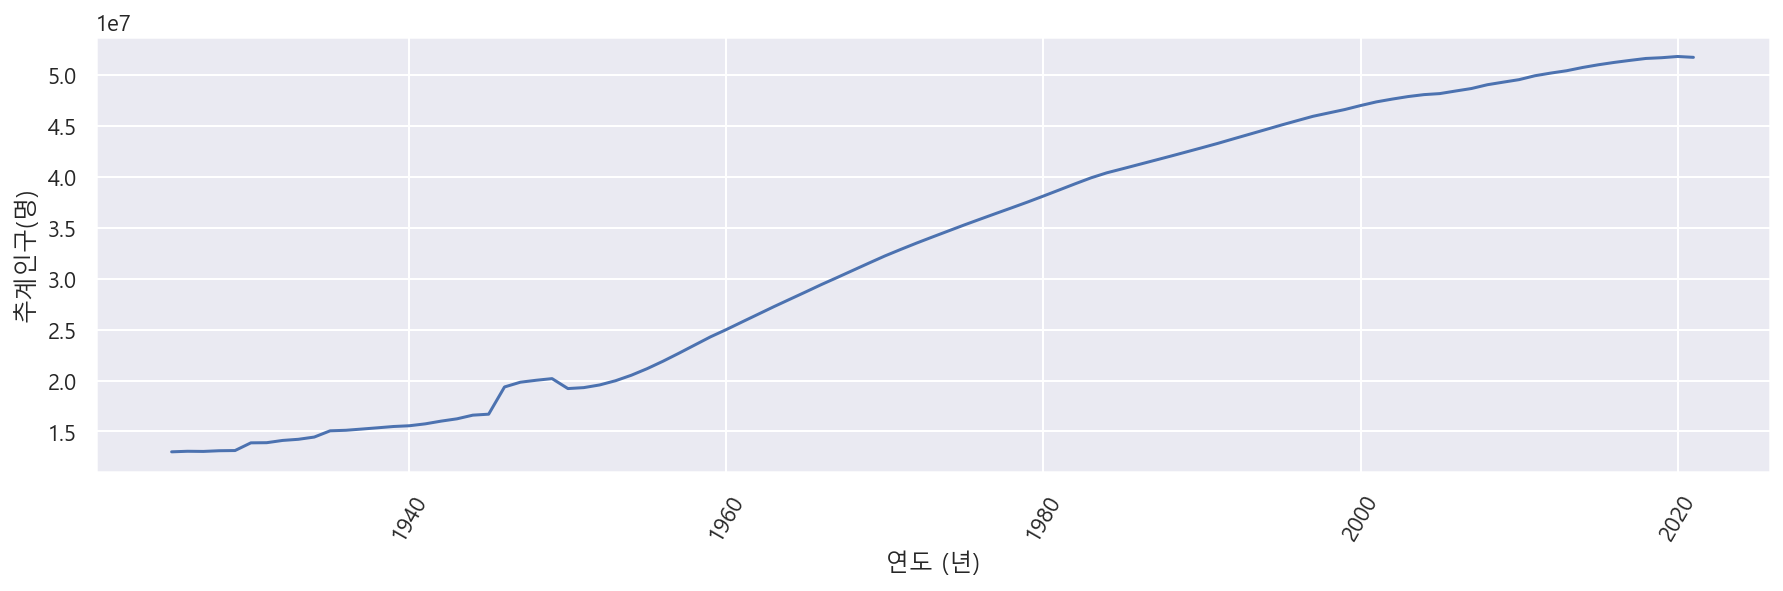

In [7]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df, x='연도 (년)', y='추계인구(명)')

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

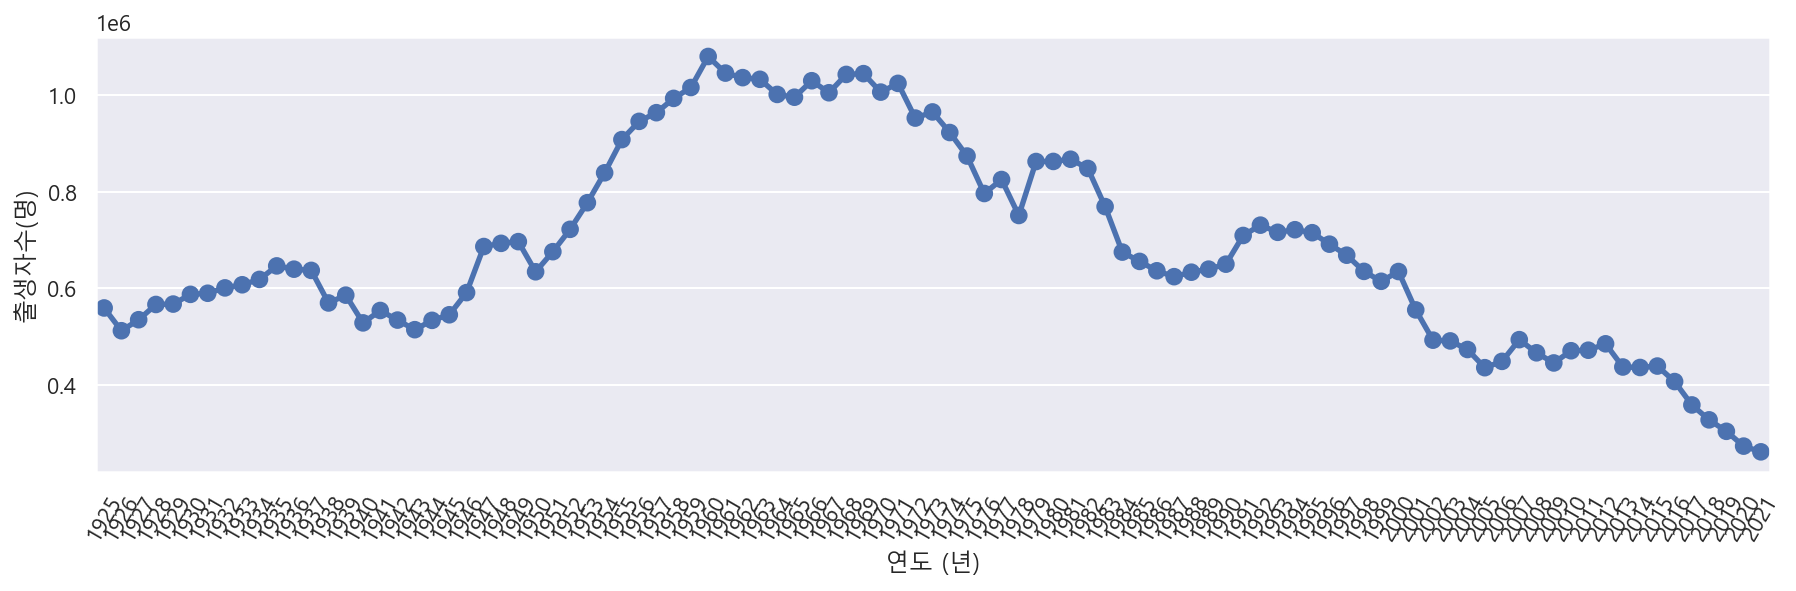

In [8]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x='연도 (년)', y='출생자수(명)')

<AxesSubplot:xlabel='연도 (년)', ylabel='출생자수(명)'>

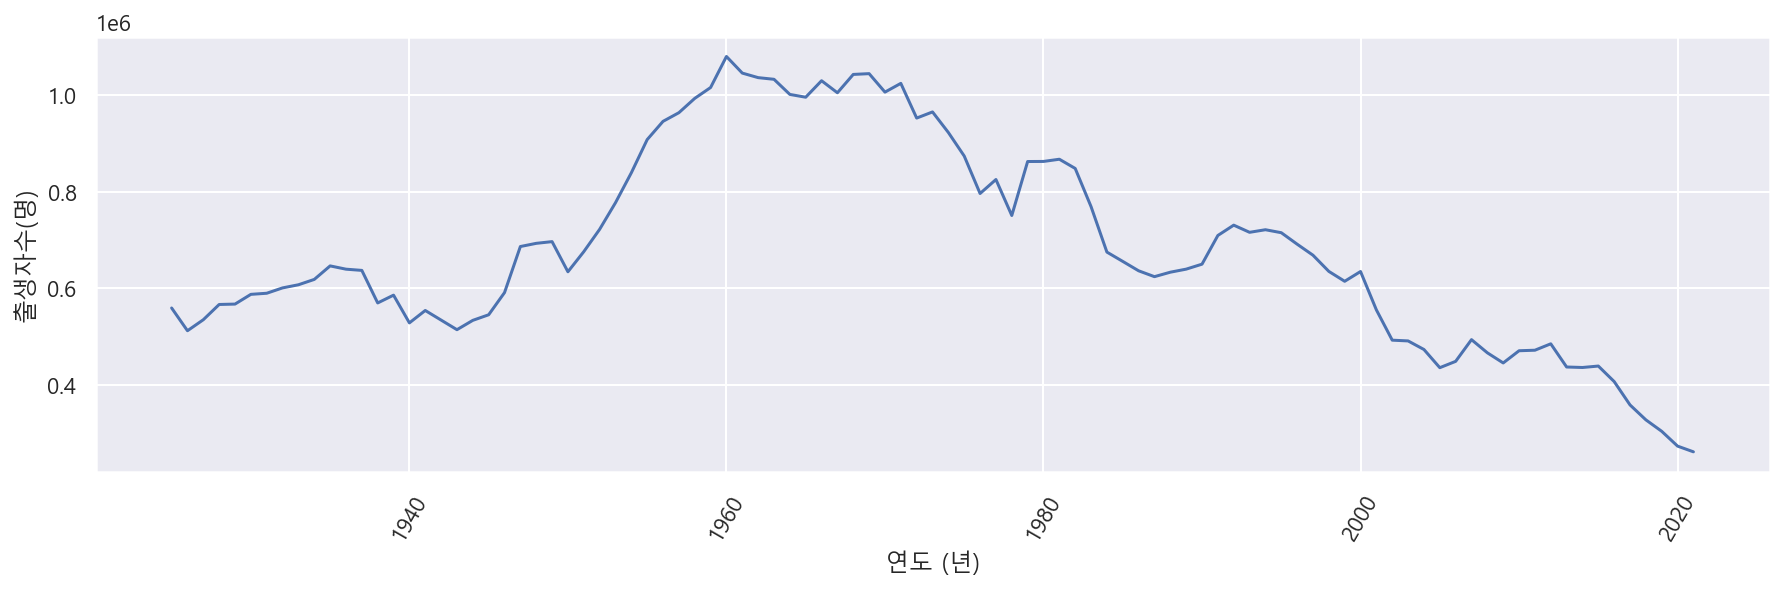

In [9]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df, x='연도 (년)', y='출생자수(명)')

<AxesSubplot:xlabel='연도 (년)', ylabel='사망자수(명)'>

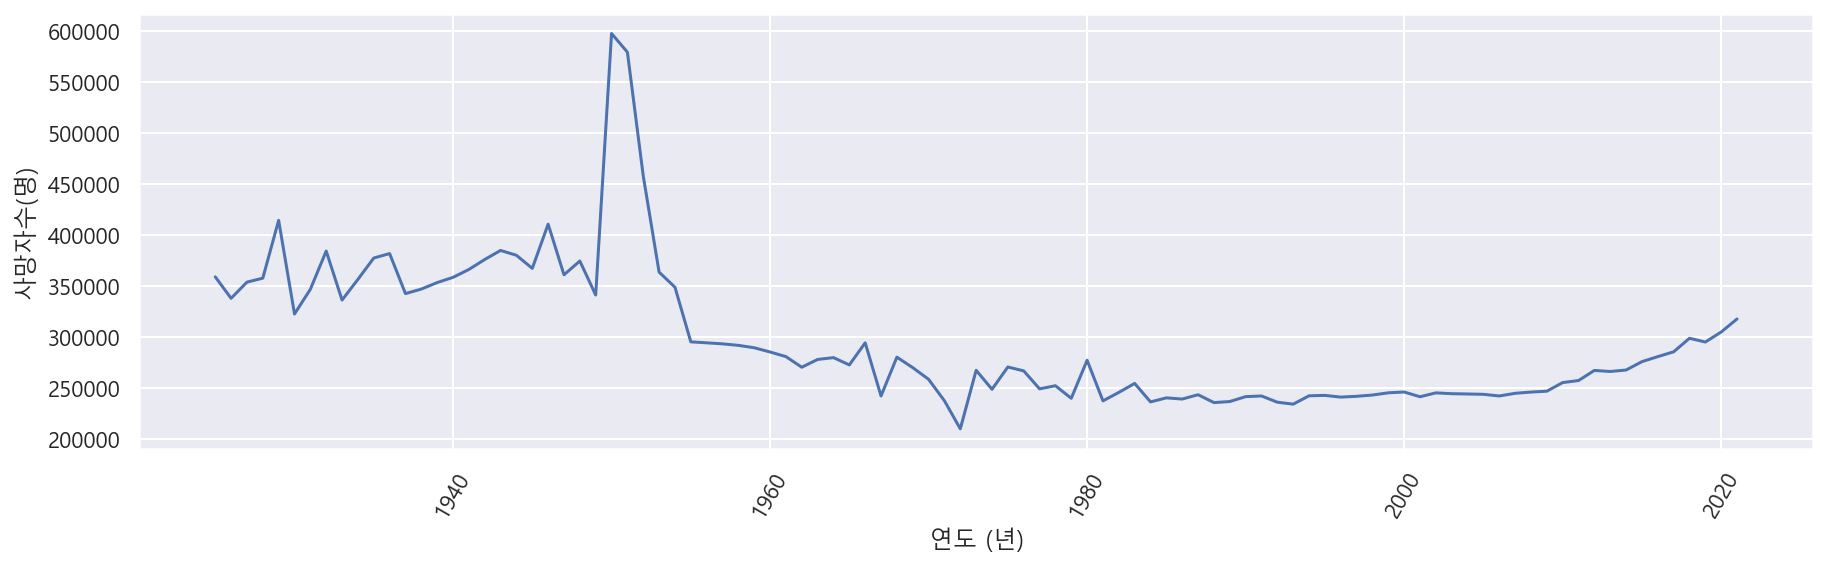

In [10]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.lineplot(data=df, x='연도 (년)', y='사망자수(명)')

In [11]:
df.columns

Index(['연도 (년)', '추계인구(명)', '출생자수(명)', '사망자수(명)', '자연증가수(명)', '조출생률 (1000명당)',
       '조사망률 (1000명당)', '자연증가율 (1000명당)', '합계출산율'],
      dtype='object')

### 위키피디아 그래프 만들기

Text(0, 0.5, '인구수(명)')

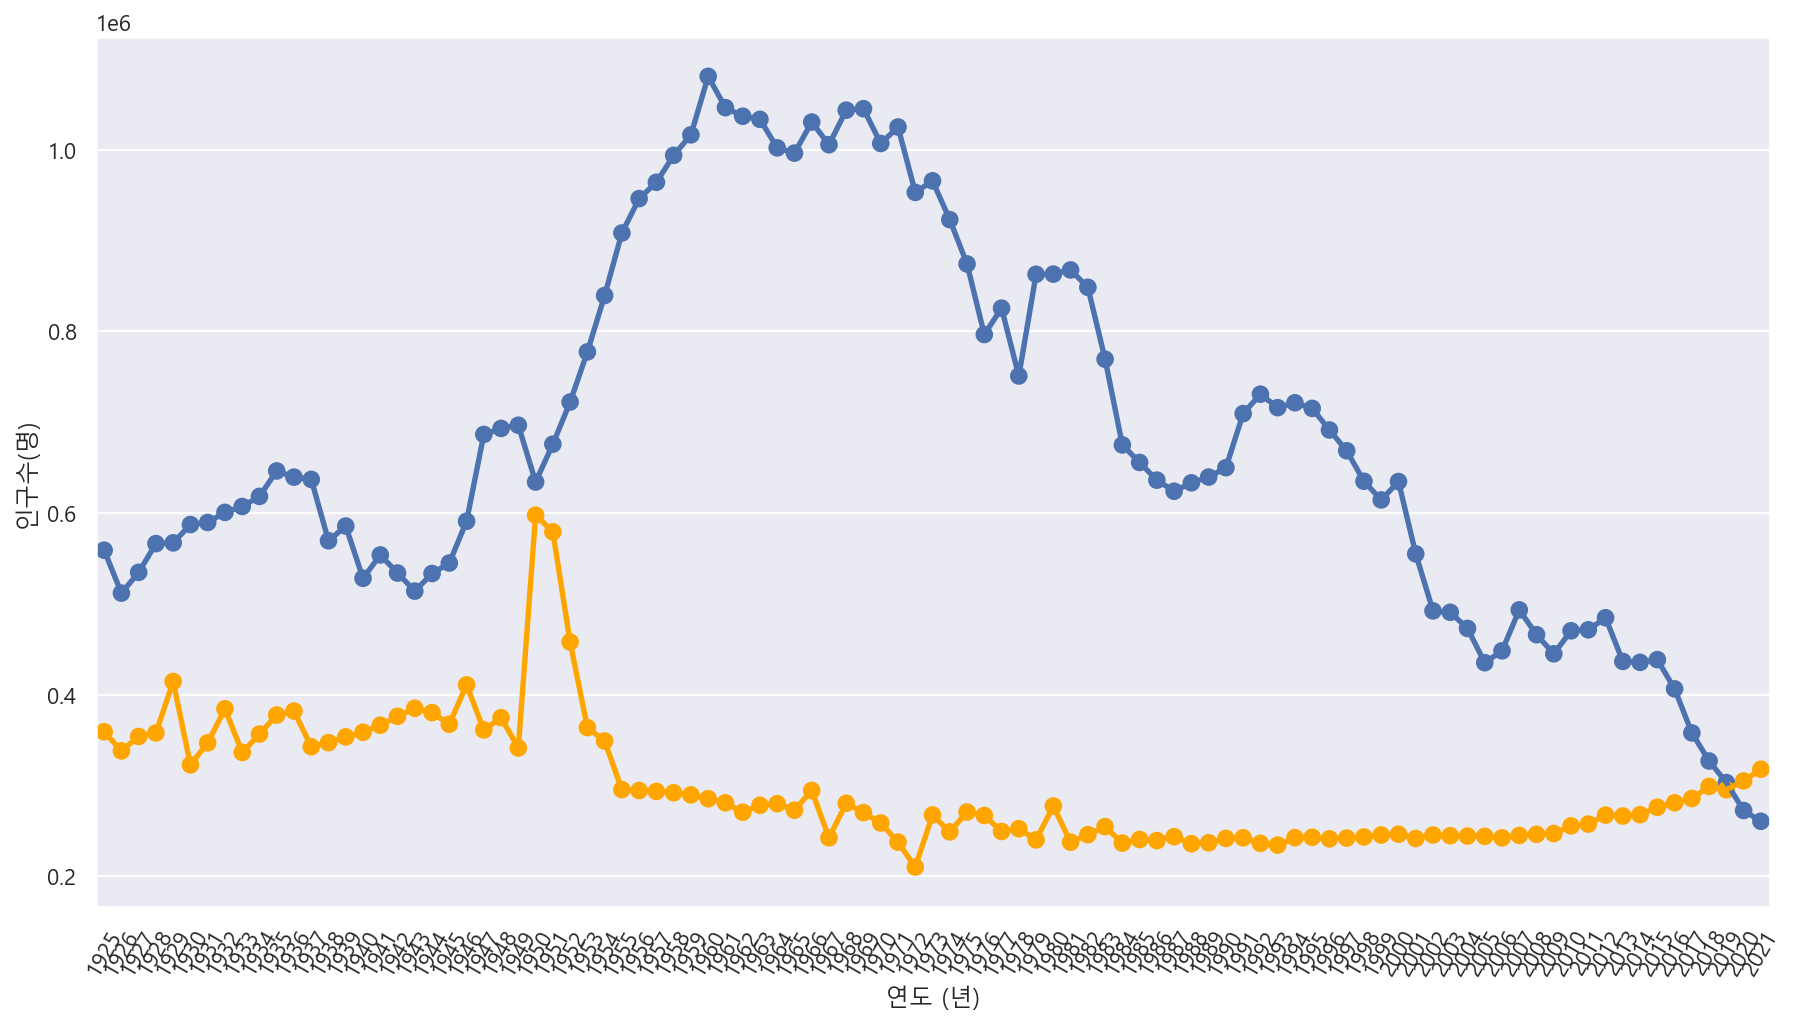

In [12]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)

sns.pointplot(data=df, x='연도 (년)', y='출생자수(명)')
sns.pointplot(data=df, x='연도 (년)', y='사망자수(명)', color='orange')
plt.ylabel('인구수(명)')

In [13]:
df.columns

Index(['연도 (년)', '추계인구(명)', '출생자수(명)', '사망자수(명)', '자연증가수(명)', '조출생률 (1000명당)',
       '조사망률 (1000명당)', '자연증가율 (1000명당)', '합계출산율'],
      dtype='object')

<AxesSubplot:xlabel='연도 (년)'>

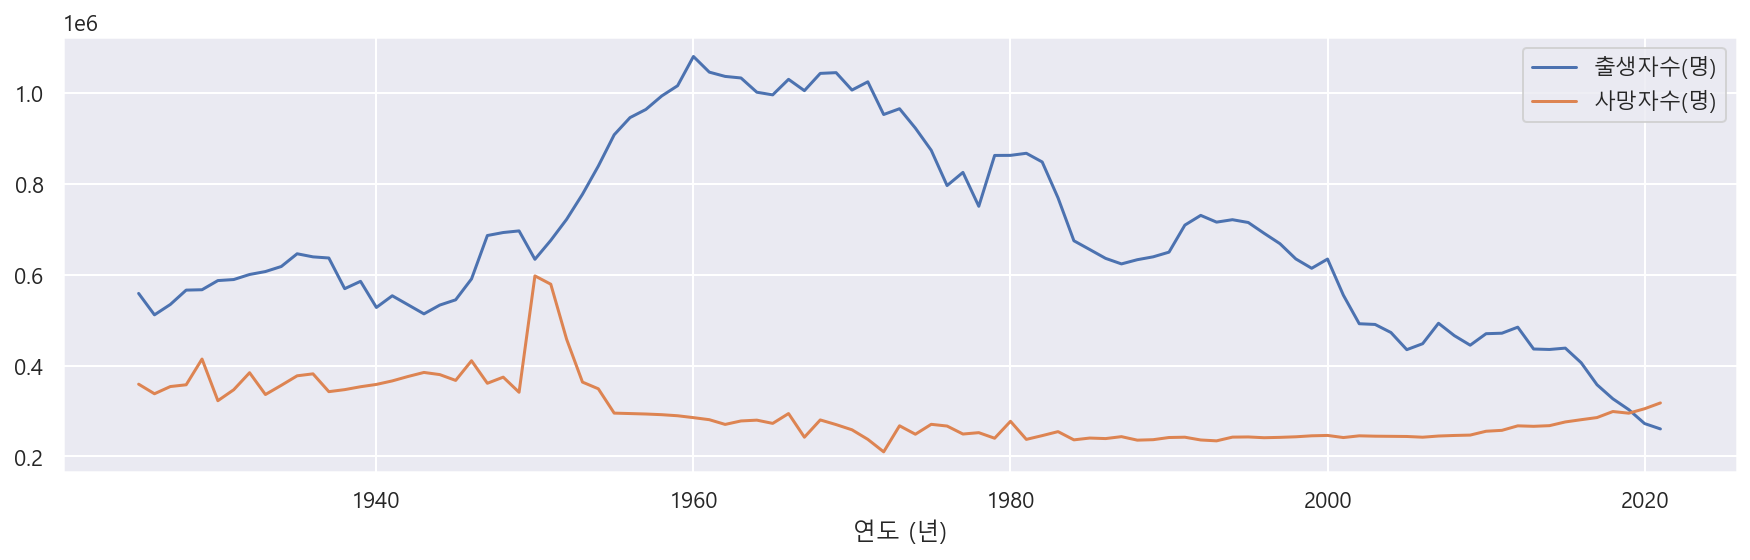

In [25]:
# 판다스로 그래프 그리기
# 1. 원하는 컬럼만 추출
df_pop = df[['연도 (년)', '출생자수(명)', '사망자수(명)']]

# 2. 그래프 축을 위한 인덱스 수정
df_pop = df_pop.set_index('연도 (년)')

# 3. 시각화
df_pop.plot(figsize=(15,4))

<AxesSubplot:xlabel='연도 (년)'>

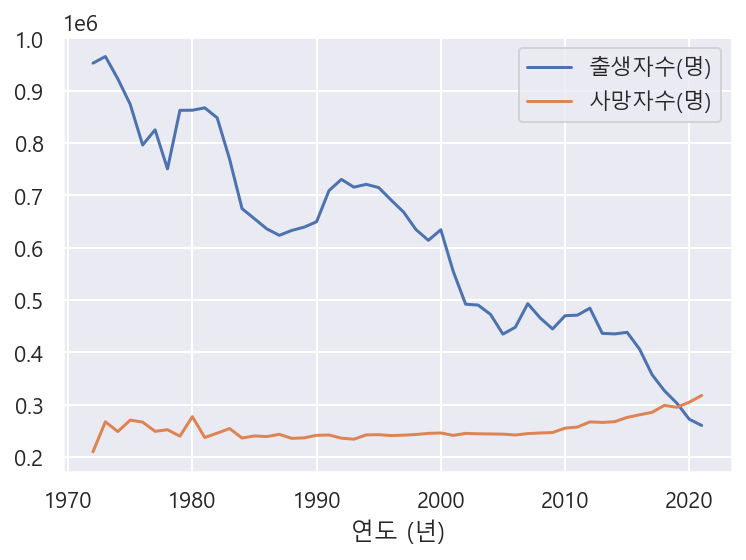

In [27]:
# 최근 50년만 시각화
df_pop[-50:].plot()

Text(0, 0.5, '인구수(명)')

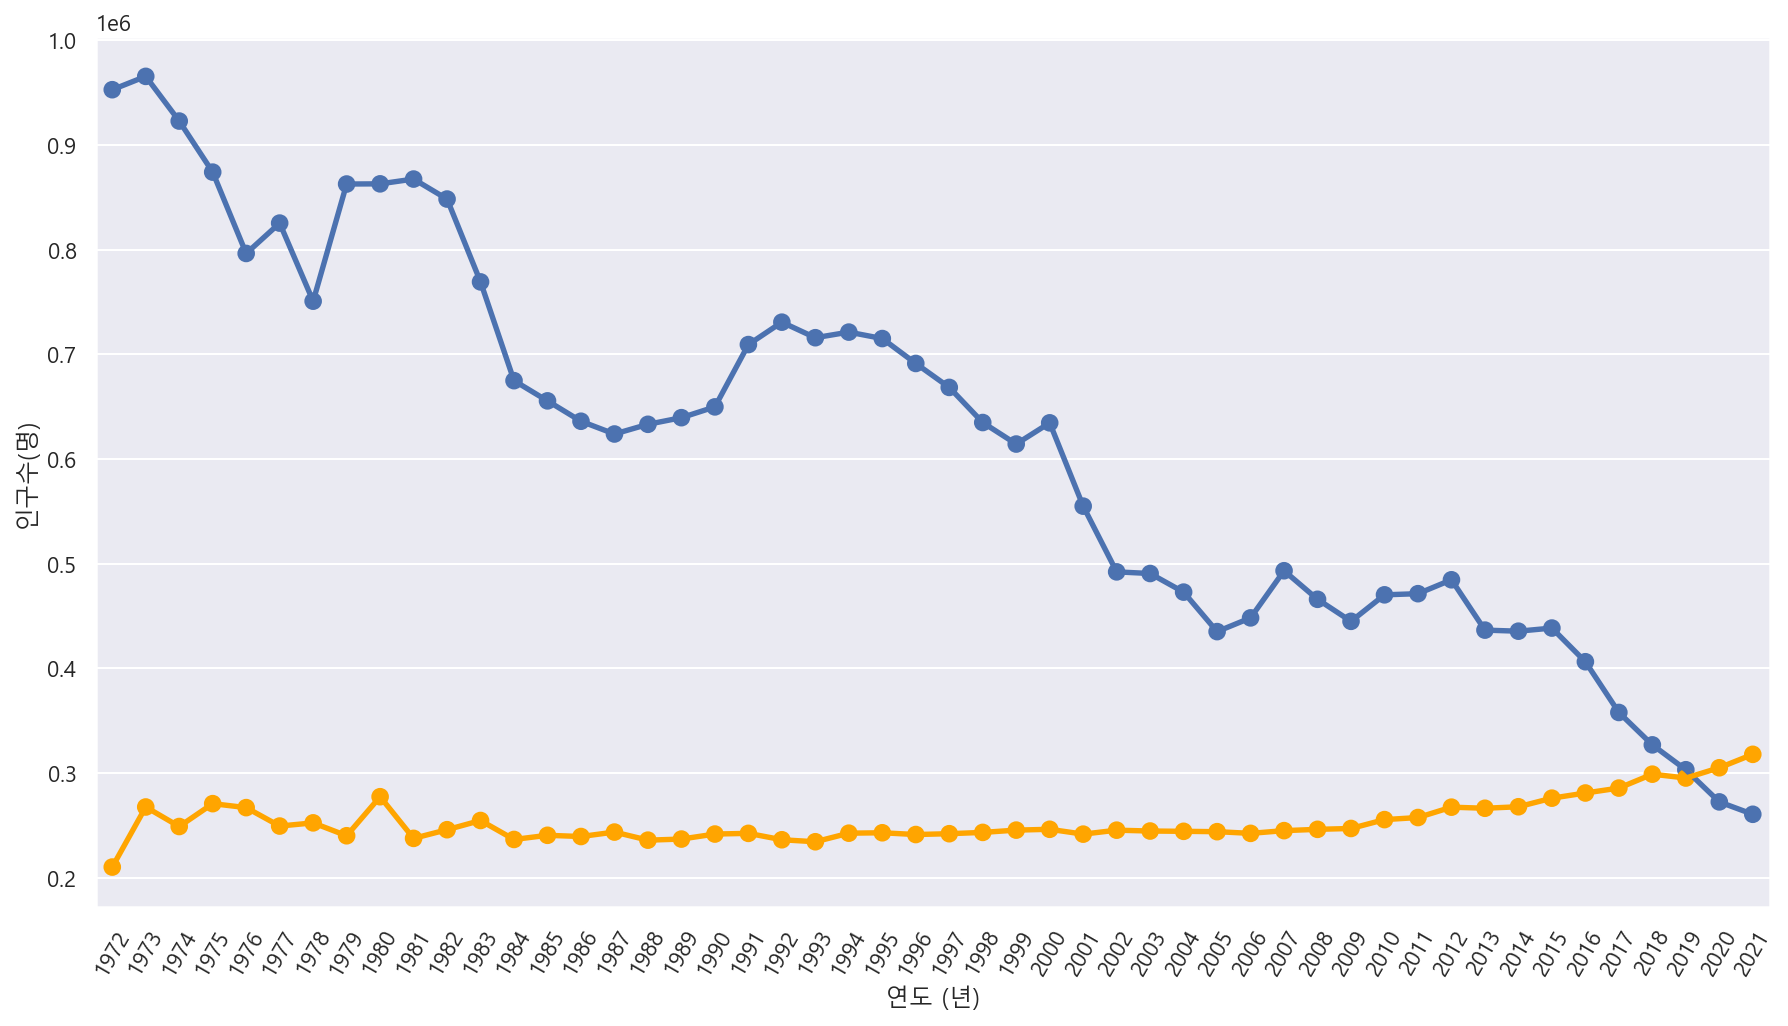

In [28]:
# SEABORN도 슬라이싱 가능
plt.figure(figsize=(15,8))
plt.xticks(rotation=60)

sns.pointplot(data=df[-50:], x='연도 (년)', y='출생자수(명)')
sns.pointplot(data=df[-50:], x='연도 (년)', y='사망자수(명)', color='orange')
plt.ylabel('인구수(명)')

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

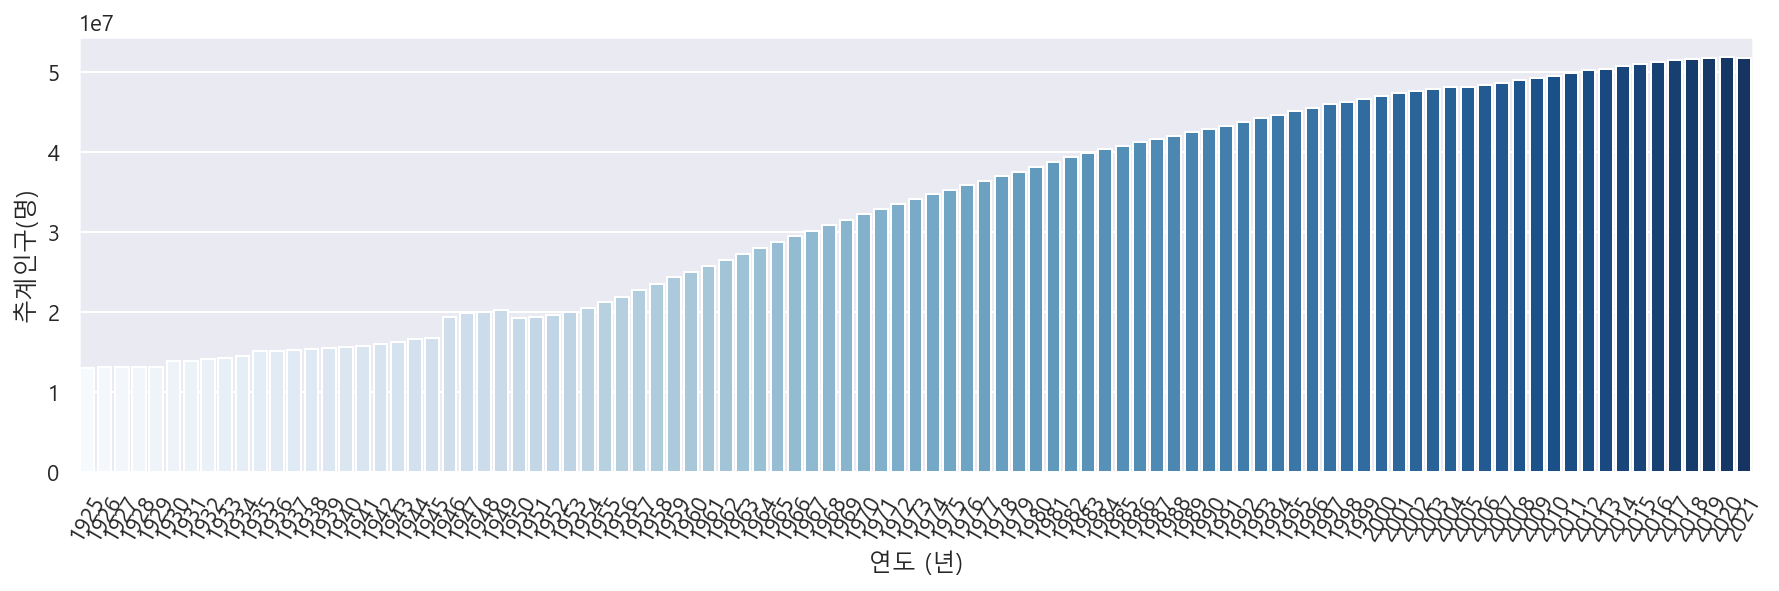

In [32]:
# 추계 인구수
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.barplot(data=df, x='연도 (년)', y='추계인구(명)', palette='Blues')

<AxesSubplot:xlabel='연도 (년)', ylabel='추계인구(명)'>

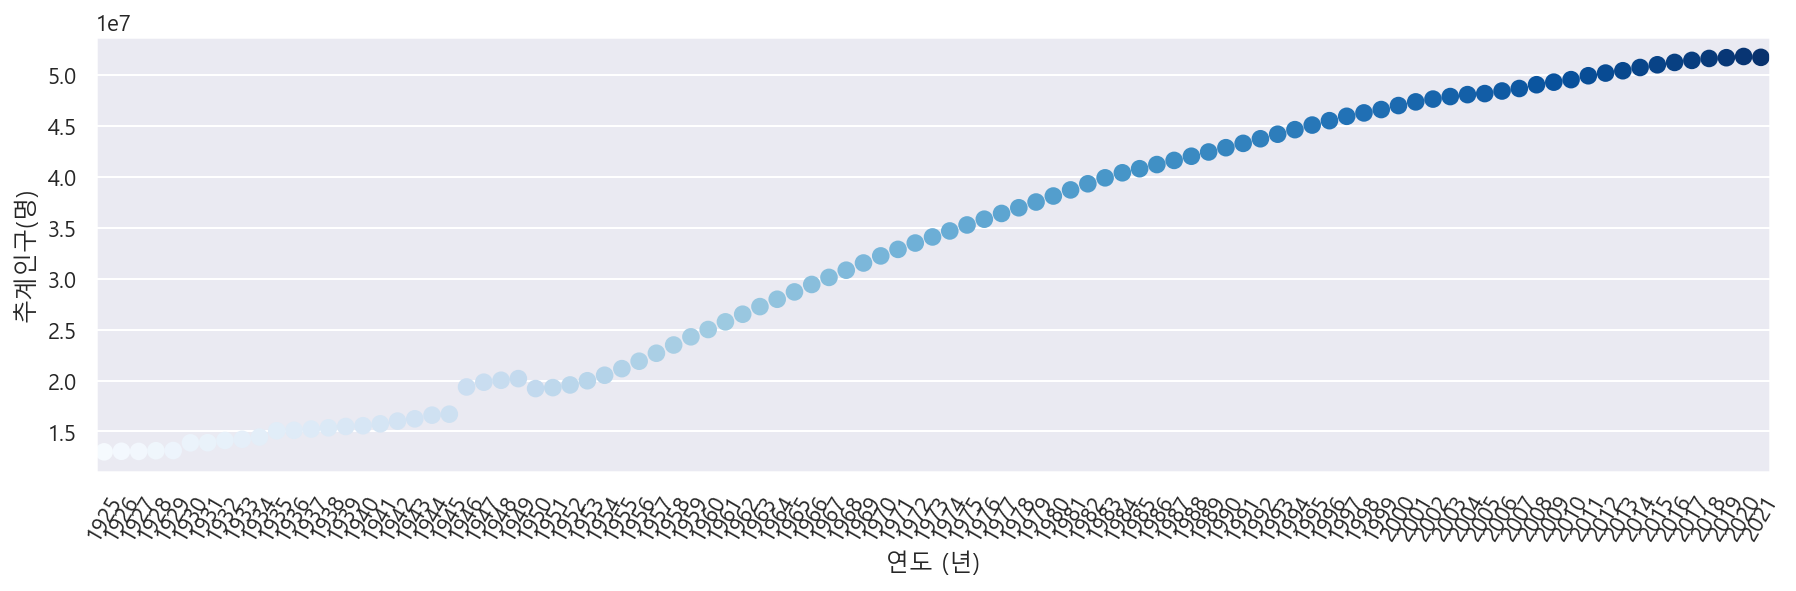

In [33]:

plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.pointplot(data=df, x='연도 (년)', y='추계인구(명)', palette='Blues')